# Assignment - Sentiment Analysis of Movie Reviews

![](https://i.imgur.com/6Wfmf2S.png)

> **Problem Statement**: Apply the TF-IDF technique to train ML models for sentiment analysis using data from the "[Sentiment Analysis on Movie Reviews](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)" Kaggle competition.


Outline:

1. Download and Explore Dataset
2. Implement the TF-IDF Technique
3. Train baseline model & submit to Kaggle
4. Train & finetune different ML models
3. Document & submit your notebook


Dataset: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews


## Download and Explore the Data

Outline:

1. Download Dataset from Kaggle
2. Explore and visualize data

### Download Dataset from Kaggle

- Read the "Description", "Evaluation" and "Data" sections on the Kaggle competition page carefully
- Make sure to download the `kaggle.json` file from your [Kaggle account](https://kaggle.com/me/account) and upload it on Colab

In [1]:
import os

In [2]:
!pwd

/content


In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [4]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

  0% 0.00/1.90M [00:00<?, ?B/s]
100% 1.90M/1.90M [00:00<00:00, 126MB/s]


In [5]:
!unzip sentiment-analysis-on-movie-reviews.zip -d data

Archive:  sentiment-analysis-on-movie-reviews.zip
  inflating: data/sampleSubmission.csv  
  inflating: data/test.tsv.zip       
  inflating: data/train.tsv.zip      


In [6]:
train_fname = './data/train.tsv.zip'
test_fname = './data/test.tsv.zip'
sub_fname = './data/sampleSubmission.csv'

### Explore and Visualize Data

* Load the train, test, and submission files using Pandas
* Explore rows, columns, sample values etc.
* Visualize distribution of target columns

In [7]:
import pandas as pd

In [8]:
raw_df = pd.read_csv(train_fname, sep='\t')

In [9]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [10]:
raw_df.Phrase.sample(10).values

array(['dysfunctional family',
       "can take credit for most of the movie 's success .",
       'sprinkled everywhere', 'something terrible happens',
       ', generous and subversive artworks', 'blazingly',
       'intricate magic', "has n't been raised above sixth-grade height",
       'a woman', 'childlike dimness'], dtype=object)

In [11]:
test_df =  pd.read_csv(test_fname,sep='\t')

In [12]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [13]:
sub_df = pd.read_csv(sub_fname)

In [14]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


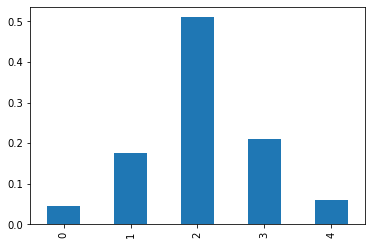

In [15]:
raw_df.Sentiment.value_counts(normalize=True).sort_index().plot(kind='bar')

Summarize your insights and learnings from the dataset below:

* `???`
* `???`
* `???`

## Implement TF-IDF Technique

![](https://i.imgur.com/5VbUPup.png)

Outline:

1. Learn the vocabulary using `TfidfVectorizer`
3. Transform training and test data

#### Learn Vocabulary using `TfidfVectorizer `

* Create custom tokenizer with stemming
* Create a list of stop words
* Configure and create `TfidfVectorizer `
* Learn vocubulary from training set
* View sample entries from vocabulary

In [16]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
stemmer = SnowballStemmer(language='english')


In [18]:
def tokenizer(text):
  return [stemmer.stem(token) for token in word_tokenize(text)  if token.isalpha()]

In [19]:
tokenizer('Is this (the) real life, or it is; fantasy?')

['is', 'this', 'the', 'real', 'life', 'or', 'it', 'is', 'fantasi']

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
selected_stopwords = stopwords.words('english')[:115]

In [22]:
', '.join(selected_stopwords)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some"

In [23]:
vectorizer = TfidfVectorizer(tokenizer=tokenizer,
                             stop_words=selected_stopwords,
                             ngram_range=(1,2),
                             max_features=2000)

In [24]:
vectorizer.fit(raw_df.Phrase)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'ourselv', 'themselv', 'whi', 'yourselv'] not in stop_words.
  % sorted(inconsistent)


TfidfVectorizer(max_features=2000, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenizer at 0x7f2716c29b90>)

In [25]:
len(vectorizer.vocabulary_)

2000

In [26]:
vectorizer.get_feature_names_out()[:200]

array(['abandon', 'abil', 'abl', 'abov', 'absolut', 'absorb', 'abstract',
       'absurd', 'abus', 'accent', 'accept', 'access', 'accomplish',
       'accur', 'ach', 'achiev', 'across', 'act', 'action', 'action film',
       'action movi', 'action sequenc', 'actor', 'actress', 'actual',
       'ad', 'adam', 'adam sandler', 'adapt', 'add', 'addit', 'adequ',
       'admir', 'admit', 'adolesc', 'adult', 'adventur', 'affair',
       'affect', 'afraid', 'age', 'ago', 'ahead', 'aim', 'aimless', 'air',
       'alien', 'aliv', 'allen', 'allow', 'almost', 'alon', 'along',
       'alreadi', 'also', 'altern', 'although', 'alway', 'amateurish',
       'amaz', 'ambigu', 'ambit', 'ambiti', 'america', 'american',
       'among', 'amount', 'amus', 'analyz', 'angel', 'angst', 'ani',
       'anim', 'ann', 'annoy', 'anoth', 'answer', 'anyon', 'anyth',
       'apart', 'appar', 'appeal', 'appear', 'appli', 'appreci',
       'approach', 'appropri', 'area', 'argu', 'argument', 'around',
       'arriv', 'art'

### Transform Training & Test Data

* Transform phrases from training set
* Transform phrases from test set
* Look at some example values

In [27]:
inputs = vectorizer.transform(raw_df.Phrase)

In [28]:
inputs.shape

(156060, 2000)

In [29]:
inputs.toarray()[0][:100]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.27620188,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.33022325, 0.29314979, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [30]:
test_inputs = vectorizer.transform(test_df.Phrase)
test_inputs.shape

(66292, 2000)

In [31]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


## Train Baseline Model & Submit to Kaggle

1. Split training and validation sets
2. Train logistic regression model
3. Study predictions on sample phrases
4. Make predictions and submit to Kaggle




### Split Training and Validation Sets

Tip: Don't use a random sample for validation set (why?)

In [32]:
TRAIN_SIZE = 110_000

In [33]:
train_inputs = inputs[:TRAIN_SIZE]
train_targets = raw_df.Sentiment[:TRAIN_SIZE]

In [34]:
train_inputs.shape, train_targets.shape

((110000, 2000), (110000,))

In [35]:
val_inputs = inputs[TRAIN_SIZE:]
val_targets = raw_df.Sentiment[TRAIN_SIZE:]

In [36]:
val_inputs.shape, val_targets.shape

((46060, 2000), (46060,))

### Train Logistic Regression Model



In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model = LogisticRegression()

In [39]:
model.fit(train_inputs,train_targets)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [40]:
train_preds = model.predict(train_inputs)

In [41]:
train_preds

array([3, 2, 2, ..., 0, 0, 2])

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(train_targets,train_preds)

0.6381818181818182

In [44]:
val_preds = model.predict(val_inputs)

In [45]:
accuracy_score(val_targets,val_preds)

0.5795049934867564

### Study Predictions on Sample Inputs

In [46]:
small_df = raw_df.sample(20)

In [47]:
small_df

,PhraseId,SentenceId,Phrase,Sentiment
77182,77183,3970,some glimpses,2
34982,34983,1646,Most of the problems with the film,1
103612,103613,5464,-- maybe too much,1
92412,92413,4812,as pleasantly,3
60195,60196,3037,the kind they,2
123104,123105,6607,dorkier,2
97177,97178,5080,'s also nice to see a movie with its heart so ...,3
38583,38584,1838,ethical issues,2
142505,142506,7735,it is also a work of deft and subtle poetry,2
46379,46380,2255,could have been a confusing and horrifying vis...,1


In [48]:
small_inputs = vectorizer.transform(small_df.Phrase)

In [49]:
small_inputs.shape

(20, 2000)

In [50]:
small_preds = model.predict(small_inputs)

In [51]:
small_preds

array([2, 1, 2, 3, 2, 2, 3, 2, 3, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Make Predictions & Submit to Kaggle

1. Make predictions on Test Dataset
2. Generate & submit CSV on Kaggle
3. Add screenshot of your score 



In [52]:
test_preds = model.predict(test_inputs)

In [53]:
test_preds

array([3, 3, 2, ..., 2, 2, 1])

In [54]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [55]:
sub_df.Sentiment = test_preds

In [56]:
sub_df.to_csv('submission.csv',index=None)

In [57]:
!head submission.csv

PhraseId,Sentiment
156061,3
156062,3
156063,2
156064,3
156065,2
156066,3
156067,3
156068,2
156069,3


## Train & Finetune Different ML Models

Train & finetune at least 2 other types of models

Models to try:
- Decision Trees
- Random Forests
- Gradient Boosting
- Naive Bayes
- SVM

Optional: 
* Use PCA for dimensionality reduction
* Compare classification vs regression models


Tips: 

- If using a regression model, make sure to round predictions to integer and clip to the range `[1,5]`
- Track your progress in a copy of [this experiment tracking spreadsheet](https://docs.google.com/spreadsheets/d/1X-tifxAOAYeIA2J32hBGP5B0MPnZy_o-zOz1NbS-1Ig/edit?usp=sharing)


### Model 1

In [58]:
from sklearn.naive_bayes import MultinomialNB

In [59]:
model1 = MultinomialNB(class_prior=(0.05,0.2,0.5,0.2,0.05))

In [60]:
model1.fit(train_inputs ,train_targets)

MultinomialNB(class_prior=(0.05, 0.2, 0.5, 0.2, 0.05))

In [61]:
accuracy_score(train_targets,model1.predict(train_inputs))

0.5881636363636363

In [62]:
accuracy_score(val_targets,model1.predict(val_inputs))

0.5453755970473295

### Model 2

In [63]:
from sklearn import tree

In [64]:
model2 = tree.DecisionTreeClassifier()

In [65]:
model2.fit(train_inputs ,train_targets)

DecisionTreeClassifier()

In [66]:
accuracy_score(train_targets,model2.predict(train_inputs))

0.7902727272727272

In [67]:
accuracy_score(val_targets,model2.predict(val_inputs))

0.5289188015631785

In [68]:
test_preds2 = model2.predict(test_inputs)
sub_df.Sentiment = test_preds2
sub_df.to_csv('submission2.csv',index=None)


In [69]:
#Random forest model

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
model3 = RandomForestClassifier(n_estimators = 50, 
                               min_samples_split = 6, 
                               min_samples_leaf= 4,
                               max_features = 'sqrt',
                               max_depth= 200, 
                               bootstrap=False)

In [72]:
model3.fit(train_inputs ,train_targets)

RandomForestClassifier(bootstrap=False, max_depth=200, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=6,
                       n_estimators=50)

In [73]:
accuracy_score(train_targets,model3.predict(train_inputs))

0.6633818181818182

In [74]:
accuracy_score(val_targets,model3.predict(val_inputs))

0.5545158488927486

In [75]:
test_preds3 = model3.predict(test_inputs)
sub_df.Sentiment = test_preds3
sub_df.to_csv('submission3.csv',index=None)

### Model 3

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

In [77]:
model4 = GradientBoostingClassifier(n_estimators=100, 
                                 learning_rate=1.0,
                                 max_depth=10, 
                                 random_state=0)

In [78]:
model4.fit(train_inputs ,train_targets)

GradientBoostingClassifier(learning_rate=1.0, max_depth=10, random_state=0)

In [79]:
accuracy_score(train_targets,model4.predict(train_inputs))

0.6532272727272728

In [80]:
accuracy_score(val_targets,model4.predict(val_inputs))

0.5547329570125923

In [81]:
test_preds4 = model4.predict(test_inputs)
sub_df.Sentiment = test_preds4
sub_df.to_csv('submission4.csv',index=None)

In [82]:
#svm model

In [83]:
from sklearn import svm

In [84]:
model5 = svm.SVC()

In [85]:
model5.fit(train_inputs ,train_targets)

SVC()

In [86]:
accuracy_score(train_targets,model5.predict(train_inputs))

0.7417090909090909

In [87]:
accuracy_score(val_targets,model5.predict(val_inputs))

0.5775075987841946

In [88]:
test_preds5 = model5.predict(test_inputs)
sub_df.Sentiment = test_preds5
sub_df.to_csv('submission5.csv',index=None)

Best Model:

??? 

(include Kaggle score screenshot)

## Submission and Future Work


How to make a submission:

- Add documentation and explanations
- Clean up any stray code/comments
- Include a screenshot of your best score
- Make a submission on the assignment page
- Review evaluation criteria carefully


Future work:
- Try more machine learning models
- Try configuring CountVectorizer differently
- Try approaches other than bag of words
